In [1]:
!pip install import-ipynb
import import_ipynb

Fields inside 'RELEASE' structured array: ('annolist', 'img_train', 'version', 'single_person', 'act', 'video_list')
Shape of 'annolist': (1, 24987)

Inspecti---- ('image', 'annorect', 'frame_sec', 'vididx')
037454012.jpg
act ::: [[(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 ...
 [(array(['transportation'], dtype='<U14'), array(['pushing car'], dtype='<U11'), array([[972]], dtype=uint16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]
 [(array([], dtype='<U1'), array([], dtype='<U1'), array([[-1]], dtype=int16))]]
Filename for index 0: 037454012.jpg
Filename for index 1: 095071431.jpg
Filename for index 2: 073199394.jpg
Filename for index 3: 059865848.jpg
Filename for index 4: 015601864.jpg
File content/mpii/images/040348287.jpg does not exist. Skipping this it

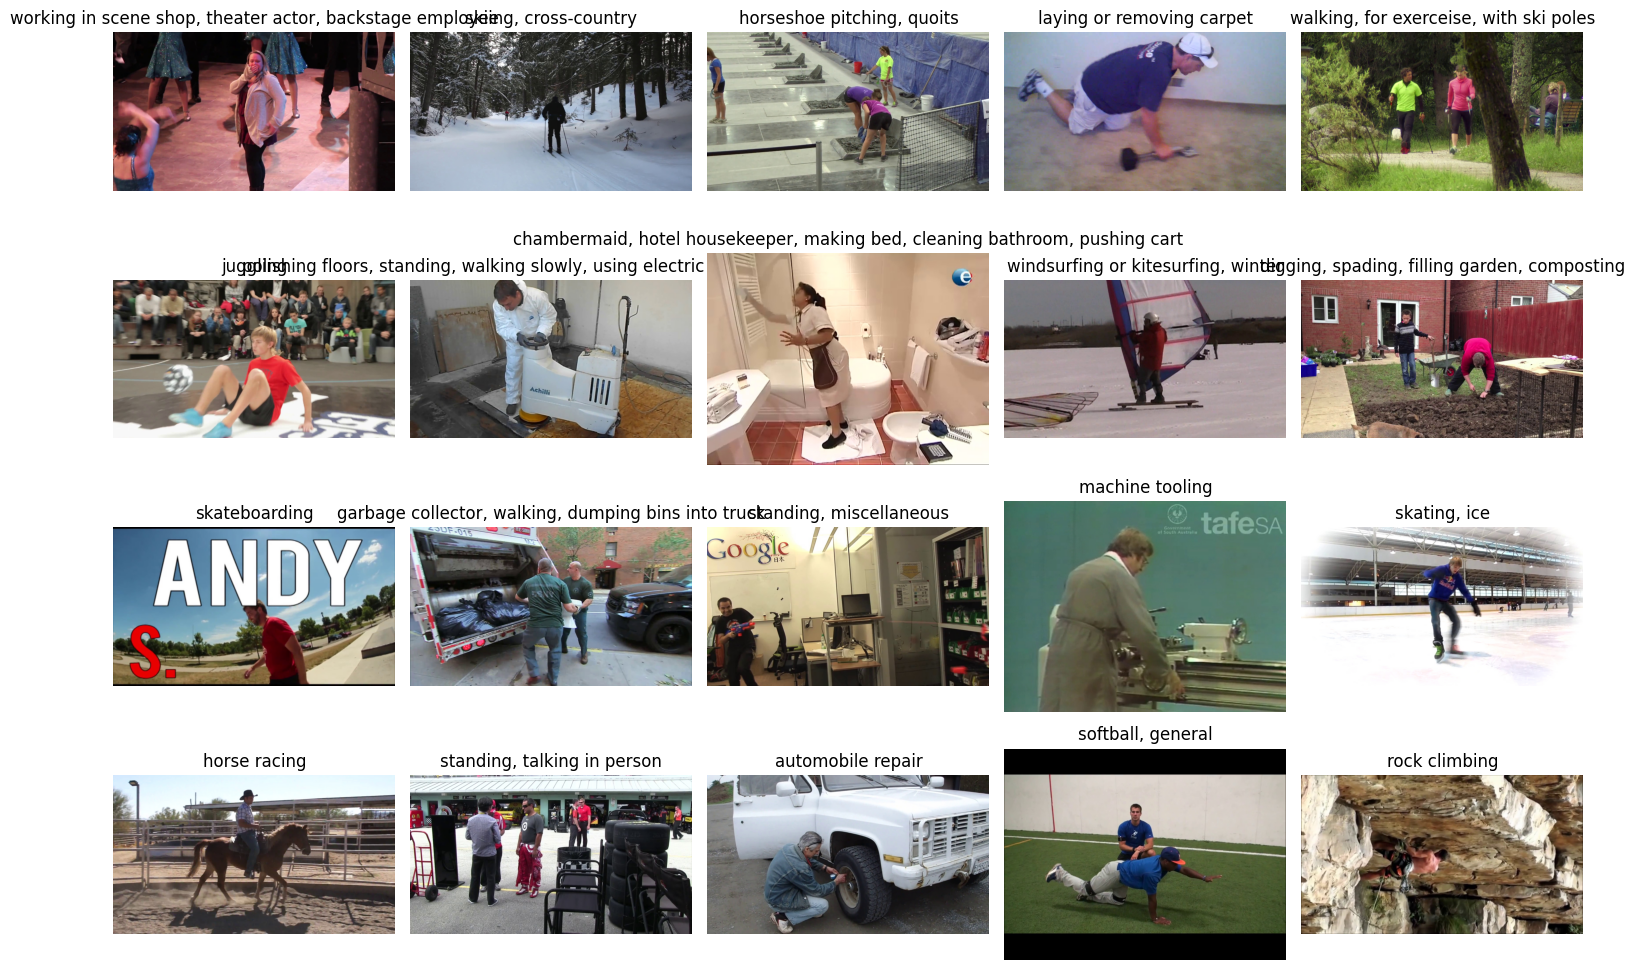

I: 0. Filename ./content/pushups/images?q=tbn:ANd9GcTipRg3kgcAKY1Tkkv3-DdWU3ieLf1D2Ufbgg&s act Name: ['push-ups']
I: 1. Filename ./content/pushups/images?q=tbn:ANd9GcSrq5Rpn32O1LrxtdJ0XHVEeAycjYnD5I1U1Q&s act Name: ['push-ups']
I: 2. Filename ./content/pushups/images?q=tbn:ANd9GcQ1zk-gZtJr_7EKR-lj7Sxbrss-IsFUwFR45A&s act Name: ['push-ups']
I: 3. Filename ./content/pushups/images?q=tbn:ANd9GcStvUucv9ug4dkD0212d969hHxxtN6dmv1ABw&s act Name: ['push-ups']
I: 4. Filename ./content/pushups/images?q=tbn:ANd9GcSFcv_uArv-n5jKvs9B3GEmTSU0EuudGQKaPg&s act Name: ['push-ups']
I: 5. Filename ./content/pushups/images?q=tbn:ANd9GcQSEDvfeLHdYfuizjS297D7Gn588-uhO4kdAA&s act Name: ['push-ups']
I: 6. Filename ./content/pushups/images?q=tbn:ANd9GcTLfIXJxE7iGQ_SJty50yNoHqQfdv1vETz-qA&s act Name: ['push-ups']
I: 7. Filename ./content/pushups/images?q=tbn:ANd9GcRaofQsvW9_l2BcEp89U0Etet77Pa_8ja5RlQ&s act Name: ['push-ups']
I: 8. Filename ./content/pushups/images?q=tbn:ANd9GcQIwJG2jONS2_la_yxpu14_OFo7HtulXYPRQw

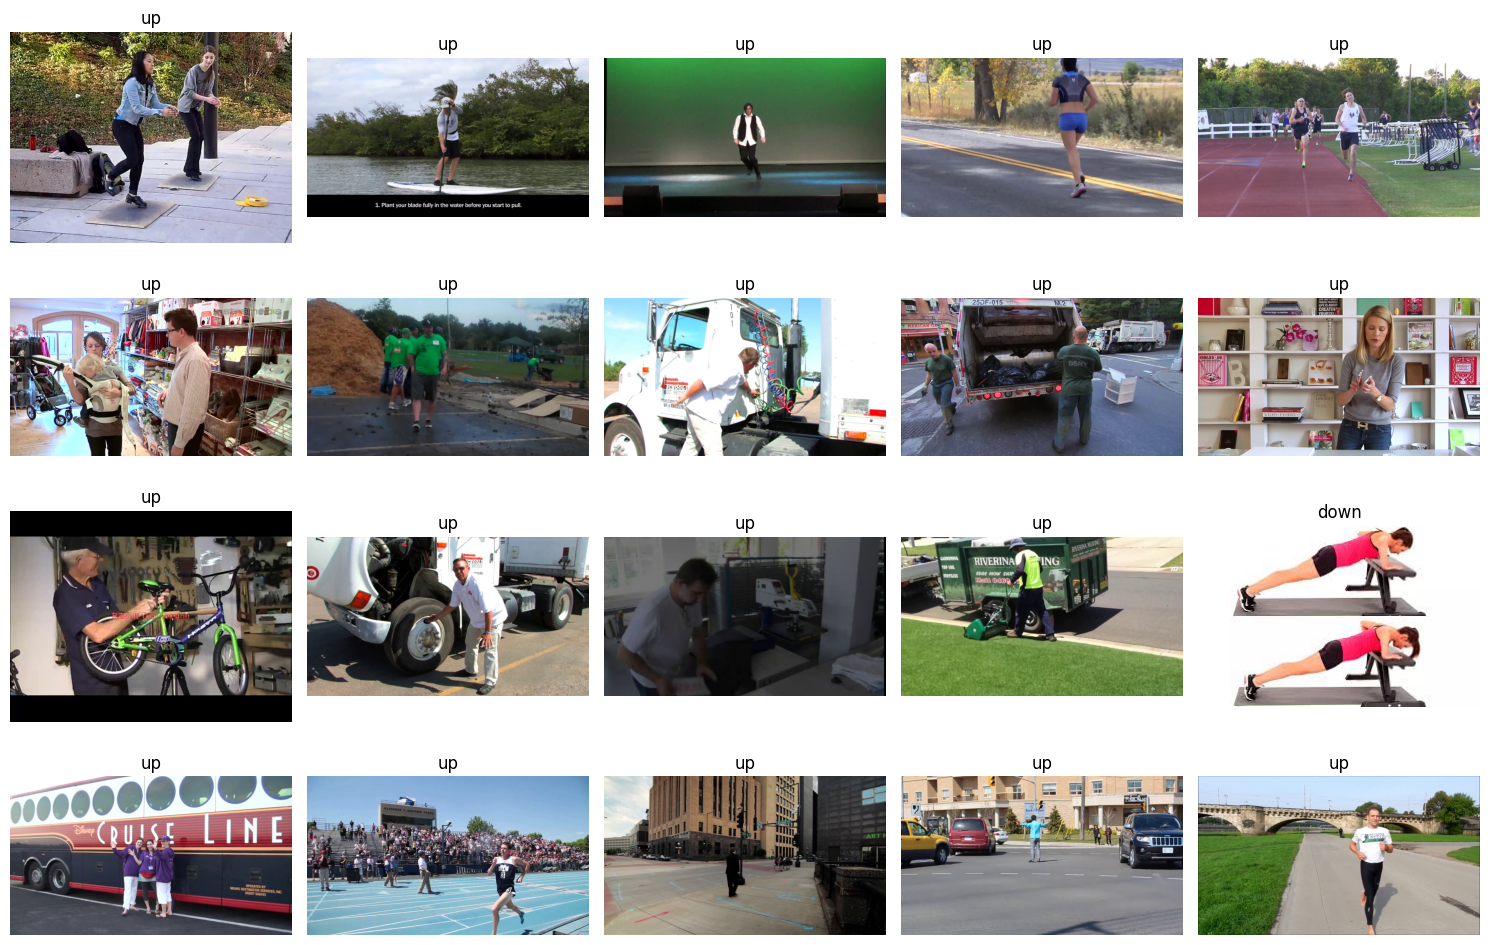

Filtered dataset size: 2485
[('content/mpii/images/002335210.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcRixjGvAlOdrViCIPbZU7L5lIS-HGeFFZ-Tbw&s', ['down']), ('content/mpii/images/022260364.jpg', ['up']), ('content/mpii/images/094630890.jpg', ['up']), ('content/mpii/images/055550898.jpg', ['up']), ('content/mpii/images/062470067.jpg', ['up']), ('content/mpii/images/055827652.jpg', ['up']), ('content/mpii/images/018077595.jpg', ['up']), ('content/mpii/images/015457215.jpg', ['up']), ('content/mpii/images/085613022.jpg', ['up']), ('content/mpii/images/010253454.jpg', ['up']), ('content/mpii/images/061548842.jpg', ['up']), ('content/mpii/images/021313848.jpg', ['up']), ('content/mpii/images/059219018.jpg', ['up']), ('content/mpii/images/032866455.jpg', ['up']), ('./content/pushups/images?q=tbn:ANd9GcQibytZun6zm_8bBfDq1jEYLnmxocEk57jLJQ&s', ['down']), ('content/mpii/images/081507399.jpg', ['up']), ('content/mpii/images/013588615.jpg', ['up']), ('content/mpii/images/041104078.jpg',

In [2]:
import import_mpii
activities_set = import_mpii.activities_set

train_loader =  import_mpii.train_loader
val_loader = import_mpii.val_loader
test_loader = import_mpii.test_loader
label_encoder = import_mpii.label_encoder
num_classes = import_mpii.num_classes

In [3]:
# import import_coco
#
# train_loader =  import_coco.train_loader
# val_loader = import_coco.val_loader
# test_loader = None

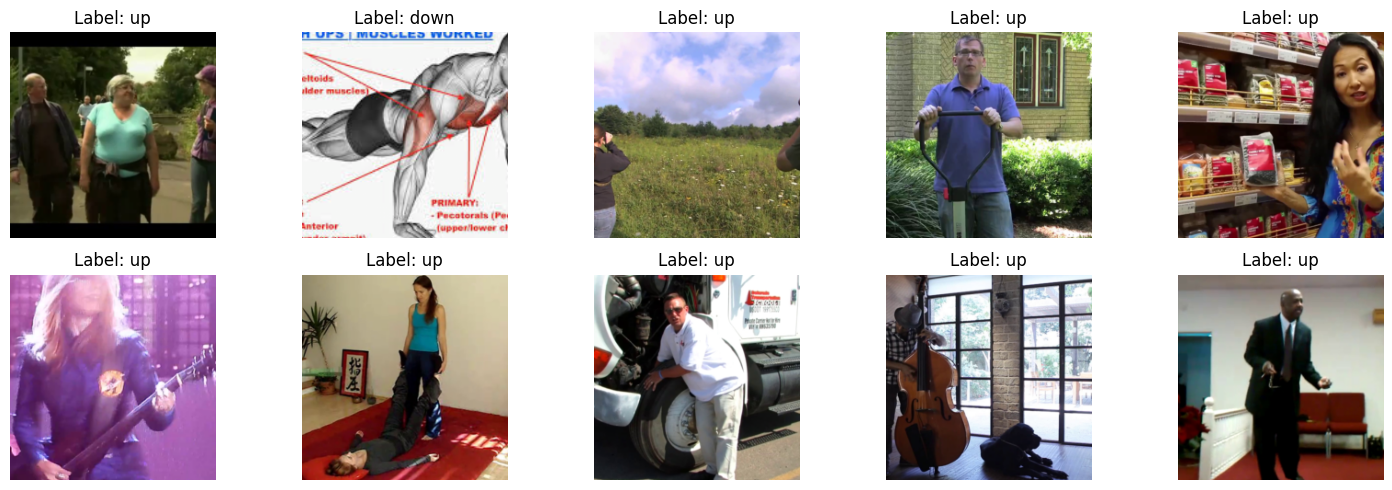

In [4]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to visualize 10 images with labels
def visualize_images_with_labels(train_loader, label_encoder):
    # Get a batch of data
    data_iter = iter(train_loader)
    images, labels = next(data_iter)

    # Reverse normalization for visualization
    inv_normalize = transforms.Normalize(
        mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    )
    images = [inv_normalize(img).permute(1, 2, 0).numpy() for img in images[:10]]

    # Plot 10 images with labels
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i].item()])[0]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_images_with_labels(train_loader, import_mpii.label_encoder)

In [5]:
import torch
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

Using device: cuda


In [6]:
# BEST
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(train_loader, val_loader, test_loader, model_class, epochs=5):

    # Initialize the model, loss function, and optimizer
    model = model_class(2)
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_acc = 0

    # Training loop
    for epoch in range(epochs):
        model.train()
        print("training... 💪")
        running_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            train_correct += (predicted == labels).sum().item()
            train_total += labels.size(0)

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_accuracy = 100 * train_correct / train_total
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()
        print("evaluating... !!!")
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                outputs = model(data)
                loss = criterion(outputs, target)
                val_loss += loss.item()

                predicted = torch.argmax(outputs, dim=1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            best_weights = model.state_dict()
            torch.save(best_weights, "best.pt")
            print(f"Saving best model...💾")

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {running_loss / len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, "
              f"Validation Accuracy: {val_accuracy:.2f}%")

    # Test evaluation
    print("\nEvaluating on test dataset...")
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = model(data)
            loss = criterion(outputs, target)
            test_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()



    return best_val_acc

training... 💪
Epoch [1/50], Batch [1/63], Loss: 0.8245
Epoch [1/50], Batch [11/63], Loss: 0.6101
Epoch [1/50], Batch [21/63], Loss: 0.6974
Epoch [1/50], Batch [31/63], Loss: 0.5151
Epoch [1/50], Batch [41/63], Loss: 0.6036
Epoch [1/50], Batch [51/63], Loss: 0.3814
Epoch [1/50], Batch [61/63], Loss: 0.2994
evaluating... !!!
Saving best model...💾
Epoch 1/50, Train Loss: 0.7249, Train Accuracy: 81.19%, Validation Loss: 0.5470, Validation Accuracy: 85.08%
training... 💪
Epoch [2/50], Batch [1/63], Loss: 0.6694
Epoch [2/50], Batch [11/63], Loss: 0.3889
Epoch [2/50], Batch [21/63], Loss: 0.3693
Epoch [2/50], Batch [31/63], Loss: 0.3676
Epoch [2/50], Batch [41/63], Loss: 0.4440
Epoch [2/50], Batch [51/63], Loss: 0.4201
Epoch [2/50], Batch [61/63], Loss: 0.2416
evaluating... !!!
Saving best model...💾
Epoch 2/50, Train Loss: 0.4494, Train Accuracy: 85.66%, Validation Loss: 0.3745, Validation Accuracy: 88.71%
training... 💪
Epoch [3/50], Batch [1/63], Loss: 0.6437
Epoch [3/50], Batch [11/63], Loss

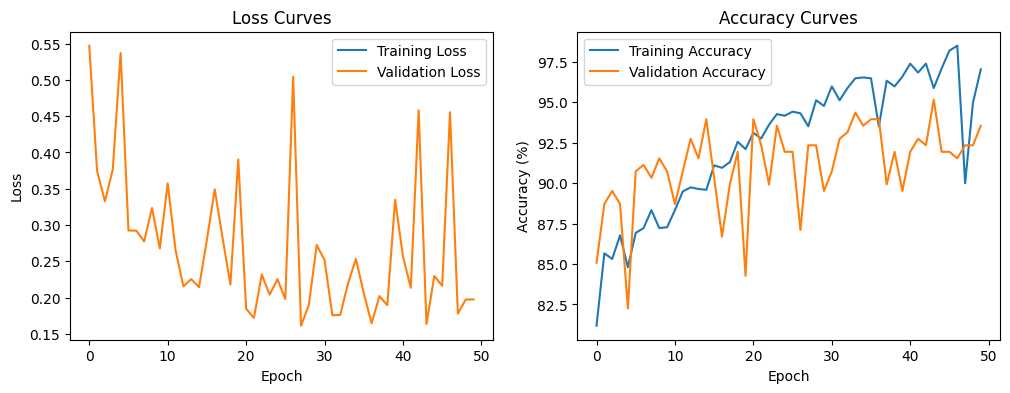

95.16129032258064

In [7]:
import torch
from models import BiTLikeModel
torch.cuda.empty_cache()
train_model(train_loader, val_loader, test_loader, model_class=BiTLikeModel, epochs=50)